# Karriere

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument("-headless")
options.add_argument("-no-sandbox")
options.add_argument("-disable-dev-shm-usage")

driver = webdriver.Chrome("chromedriver", options=options)




# job = "Machine Learning"
job = input("Name of the job \n")
url ="https://www.karriere.at/jobs?keywords=" + job + "&focusResults=true"

driver.get(url)

Name of the job 
Java Developer


In [2]:
print("EXTRACTING DATA FROM KARRIERE")

EXTRACTING DATA FROM KARRIERE


In [3]:
from selenium.webdriver.common.keys import Keys
import time

page = 1
while True:
  try:
    continueBtn = driver.find_element(By.CLASS_NAME, "m-loadMoreJobsButton__button")
  except Exception:  
    break

  continueBtn.send_keys(Keys.ENTER)
  page += 1
  print("Page: " + str(page))
  time.sleep(1)

Page: 2
Page: 3
Page: 4
Page: 5
Page: 6
Page: 7
Page: 8
Page: 9
Page: 10
Page: 11
Page: 12
Page: 13
Page: 14
Page: 15
Page: 16
Page: 17
Page: 18
Page: 19
Page: 20
Page: 21
Page: 22
Page: 23
Page: 24
Page: 25
Page: 26
Page: 27
Page: 28
Page: 29
Page: 30
Page: 31
Page: 32
Page: 33
Page: 34
Page: 35
Page: 36


In [4]:
links = driver.find_elements(By.CLASS_NAME, "m-jobsListItem__titleLink")
print("Count: " + str(len(links)))
urls = []

for link in links:
  urls.append(link.get_attribute("href"))

Count: 519


In [5]:
from bs4 import BeautifulSoup
import re

def clean(html):
  soup = BeautifulSoup(html, "lxml")
  body = soup.find("body").text.strip()
  return re.sub(r'[\ \n]{2,}', ' ', body)

In [6]:
data = []
count = 1

while count < len(urls):
  url = urls[count]
  print("Link: " + str(count))

  driver.get(url)
  title = driver.title

  try:
    iFrame = driver.find_element(By.CLASS_NAME, "m-jobContent__iFrame")
  except Exception:  
    print('Pause...')
    time.sleep(30)
    continue
    
  html = iFrame.get_attribute('srcdoc')
  data.append({
      'title': title,
      'text': clean(html),
      'url': url
  })

  count += 1

Link: 1
Link: 2
Link: 3
Link: 4
Link: 5
Link: 6
Link: 7
Link: 8
Link: 9
Link: 10
Link: 11
Link: 12
Link: 13
Link: 14
Link: 15
Link: 16
Link: 17
Link: 18
Link: 19
Link: 20
Link: 21
Link: 22
Link: 23
Link: 24
Link: 25
Link: 26
Link: 27
Link: 28
Link: 29
Link: 30
Link: 31
Link: 32
Link: 33
Link: 34
Link: 35
Link: 36
Link: 37
Link: 38
Link: 39
Link: 40
Link: 41
Link: 42
Link: 43
Link: 44
Link: 45
Link: 46
Link: 47
Link: 48
Link: 49
Link: 50
Link: 51
Link: 52
Link: 53
Link: 54
Link: 55
Link: 56
Link: 57
Link: 58
Link: 59
Link: 60
Link: 61
Link: 62
Link: 63
Link: 64
Link: 65
Link: 66
Link: 67
Link: 68
Link: 69
Link: 70
Link: 71
Link: 72
Link: 73
Link: 74
Link: 75
Link: 76
Link: 77
Link: 78
Link: 79
Link: 80
Link: 81
Link: 82
Link: 83
Link: 84
Link: 85
Link: 86
Link: 87
Link: 88
Link: 89
Link: 90
Link: 91
Link: 92
Link: 93
Link: 94
Link: 95
Link: 96
Link: 97
Link: 98
Link: 99
Link: 100
Link: 101
Link: 102
Link: 103
Link: 104
Link: 105
Link: 106
Link: 107
Link: 108
Link: 109
Link: 110
Link: 11

In [7]:
import pandas as pd

df1 = pd.DataFrame(data)
df1.to_csv("karriere1.csv", encoding="utf-8") 

In [8]:
df1

,title,text,url
0,Developer für Webapplikationen (d/m/w) bei Rai...,Developer für Webapplikationen (d/m/w) Gestalt...,https://www.karriere.at/jobs/6594560
1,Junior Software Entwickler (m/w/d) bei A.S.E. ...,Schließt Du gerade Deine IT-Ausbildung ab? Bri...,https://www.karriere.at/jobs/6496982
2,(Junior) Java Developer (m/w/d) bei Computer F...,(Junior) Java Developer (m/w/d) - Wien (Junior...,https://www.karriere.at/jobs/6587738
3,Java Software Developer (m/w/d) bei Amiblu Hol...,Amiblu ist der führende Spezialist für Rohrsys...,https://www.karriere.at/jobs/6661388
4,Java Developer (m/w/x) bei IBM Client Innovati...,JAVA DEVELOPER (m/w/x) Standort Wien | Startda...,https://www.karriere.at/jobs/6594230
...,...,...,...
513,Frontend Developer (w/m/d) bei GeoSphere Austr...,Die GeoSphere Austria - Bundesanstalt für Geol...,https://www.karriere.at/jobs/6657284
514,Senior Frontend Engineer - React/Typescript be...,Senior Frontend Engineer - React/Typescript AT...,https://www.karriere.at/jobs/6646775
515,Solution Architect (m/w/d) bei T-Systems Austr...,Job-ID: 211297Solution Architect (m/w/d)#Micro...,https://www.karriere.at/jobs/6470576
516,Senior Full Stack Engineer (f/m/d) bei Adverit...,"Senior Full Stack Engineer (f/m/d) Vienna, Aus...",https://www.karriere.at/jobs/6606986


# IT Stellen

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By

options = webdriver.ChromeOptions()
options.add_argument("-headless")
options.add_argument("-no-sandbox")
options.add_argument("-disable-dev-shm-usage")

driver = webdriver.Chrome("chromedriver", options=options)

# job = "Machine Learning"
url ="https://www.itstellen.at/jobs?keywords=" + job + "&locations=&page="

driver.get(url)

In [10]:
print("EXTRACTING DATA FROM IT_STELLEN")

EXTRACTING DATA FROM IT_STELLEN


In [11]:
from selenium.webdriver.common.keys import Keys
import time

urls = []
page = 1
tries = 0

In [12]:
while True:
  driver.get(url + str(page))
  links = driver.find_elements(By.CSS_SELECTOR, ".jobInformation h3 a")
    
  if len(links) < 1: 
    if tries > 2:
      break
    else:
      time.sleep(20)
      tries += 1
      continue

  print("Page " + str(page) + ": " + str(len(links)))    
  for link in links:
      urls.append(link.get_attribute("href"))

  tries = 0
  page += 1
  time.sleep(10)

Page 1: 18
Page 2: 15
Page 3: 15
Page 4: 15
Page 5: 15
Page 6: 15
Page 7: 15
Page 8: 15
Page 9: 15
Page 10: 15
Page 11: 15
Page 12: 15
Page 13: 15
Page 14: 15
Page 15: 15
Page 16: 15
Page 17: 15
Page 18: 15
Page 19: 15
Page 20: 15
Page 21: 15
Page 22: 15
Page 23: 15
Page 24: 15
Page 25: 15
Page 26: 15
Page 27: 15
Page 28: 15
Page 29: 15
Page 30: 15
Page 31: 15
Page 32: 15
Page 33: 15
Page 34: 15
Page 35: 15
Page 36: 3


In [13]:
from bs4 import BeautifulSoup
import re

def clean(html):
  soup = BeautifulSoup(html, "lxml")
  body = soup.find("body").text.strip()
  return re.sub(r'[\ \n]{2,}', ' ', body)

In [14]:
data = []
count = 1

while count < len(urls):
  url = urls[count]
  print("Link: " + str(count))

  driver.get(url)
  title = driver.title.replace(" – itstellen.at", "")

  try:
    content = driver.find_element(By.CLASS_NAME, "jobContent").get_attribute('innerHTML')
  except Exception:  
    print('Pause...')
    time.sleep(30)
    continue
    
  data.append({
      'title': title,
      'text': clean(content),
      'url': url
  })

  count += 1
  time.sleep(5)

Link: 1
Link: 2
Link: 3
Link: 4
Link: 5
Link: 6
Link: 7
Link: 8
Link: 9
Link: 10
Link: 11
Link: 12
Link: 13
Link: 14
Link: 15
Link: 16
Link: 17
Link: 18
Link: 19
Link: 20
Link: 21
Link: 22
Link: 23
Link: 24
Link: 25
Link: 26
Link: 27
Link: 28
Link: 29
Link: 30
Link: 31
Link: 32
Link: 33
Link: 34
Link: 35
Link: 36
Link: 37
Link: 38
Link: 39
Link: 40
Link: 41
Link: 42
Link: 43
Link: 44
Link: 45
Link: 46
Link: 47
Link: 48
Link: 49
Link: 50
Link: 51
Link: 52
Link: 53
Link: 54
Link: 55
Link: 56
Link: 57
Link: 58
Link: 59
Link: 60
Link: 61
Link: 62
Link: 63
Link: 64
Link: 65
Link: 66
Link: 67
Link: 68
Link: 69
Link: 70
Link: 71
Link: 72
Link: 73
Link: 74
Link: 75
Link: 76
Link: 77
Link: 78
Link: 79
Link: 80
Link: 81
Link: 82
Link: 83
Link: 84
Link: 85
Link: 86
Link: 87
Link: 88
Link: 89
Link: 90
Link: 91
Link: 92
Link: 93
Link: 94
Link: 95
Link: 96
Link: 97
Link: 98
Link: 99
Link: 100
Link: 101
Link: 102
Link: 103
Link: 104
Link: 105
Link: 106
Link: 107
Link: 108
Link: 109
Link: 110
Link: 11

In [15]:
import pandas as pd

df2 = pd.DataFrame(data)
df2.to_csv('IT-Stellen1.csv')

In [16]:
df2

,title,text,url
0,Backend Developer (m/w/d),Verstärken Sie unseren Bereich Forschung & Ent...,https://www.itstellen.at/j/6668921
1,"Full Stack Developer, PHP, Vue, Nuxt (m/w/x)",IWAVES Media Full Service Digital. Seit 2002 s...,https://www.itstellen.at/j/6655286
2,(Junior) Java Developer (m/w/d),(Junior) Java Developer (m/w/d) - Wien\n(Junio...,https://www.itstellen.at/j/6587738
3,Java Software Developer (m/w/d),Amiblu ist der führende Spezialist für Rohrsys...,https://www.itstellen.at/j/6661388
4,Java Developer (m/w/x),JAVA DEVELOPER (m/w/x)\nStandort Wien | Startd...,https://www.itstellen.at/j/6594230
...,...,...,...
525,Frontend Developer (w/m/d),Die GeoSphere Austria - Bundesanstalt für Geol...,https://www.itstellen.at/j/6657284
526,Senior Frontend Engineer - React/Typescript,Senior Frontend Engineer - React/Typescript\nA...,https://www.itstellen.at/j/6646775
527,Solution Architect (m/w/d),Job-ID: 211297 Solution Architect (m/w/d)\nMic...,https://www.itstellen.at/j/6470576
528,Senior Full Stack Engineer (f/m/d),"Senior Full Stack Engineer (f/m/d)\nVienna, Au...",https://www.itstellen.at/j/6606986


# Meta Jobs

In [17]:
print("EXTRACTING DATA FROM META JOBS")

EXTRACTING DATA FROM META JOBS


In [18]:
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [19]:
def click_next_page(driver):
    """
    This function is responsible for clicking the 'next' button to navigate to the next page.
    We are using xpath here since static id is missing.
    For locating the exact element, below logic is used:

    1. extract all buttons in the footer via xpath.
    2. extract the last element from the list of buttons.
    3. this is done since the array length changes when we navigate to page 4 onwards.
    4. 'next' button would always be the last in the list so we fetch it via -1 index.
    """

    buttons = driver.find_elements(By.XPATH,
                                   '/html/body/div/div[2]/div[2]/div/div/div[1]/div[2]/div/div/div[2]/div[1]/div[2]/div/button')
    next_button = buttons[-1]
    next_disabled = next_button.get_property("disabled")

    print('Next page button disabled? {disabled}'.format(disabled=next_disabled))
    if next_button.is_enabled() or not next_disabled:
        next_button.click()
        time.sleep(2)
        return True
    else:
        return False

In [20]:
def click_page_size(driver, count):
    """
    This function is responsible for changing the default number of entries on the page.
    By default we have 10 entries, that could lead to alot of pages to be scraped.
    We change this to 50 (by clicking on it twice).
    This reduces the number of pages to be extracted.
    """

    for i in range(count):
        driver.find_element(By.XPATH, '/html/body/div/div[2]/div[2]/div/div/div[1]/div[1]/button[3]').click()
        time.sleep(1)


In [21]:
def extract_metadata_for_job(job):
    """
    This function is responsible for extracting the metadata for each job entry.
    metadata consists of title, description and job URL.

    :param job: DOM element for the job entry.
    :return: dict containing metadata info.
    """
    metadata = None
    job = job.find("div", class_="job-text-div")
    try:
        title = job.find("a", class_="resultUrl hyphenate").text
        desc = job.find("div", class_="snippet hyphenate").text
        job_url = base_url + job.find("a", class_="resultUrl hyphenate").get("href")
        metadata = {"title": title, "text": desc, "url": job_url}
    except:
        pass  # silently ignore any parsing failure
    finally:
        return metadata

In [24]:
def extract_metadata_for_page(driver):
    """
    This function is responsible for extracting the metadata for all the jobs listed on this page.
    :param driver:
    :return: dataframe with metadata for all job entries found on the page.
    """

    df = pd.DataFrame(columns=['title', 'text', 'url'])
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find("div", class_="joblist").findChildren()

    for job in jobs:
        metadata = extract_metadata_for_job(job)
        if metadata:
            df = df.append(metadata, ignore_index=True)
    return df
if __name__ == '__main__':

    base_url = 'https://www.metajob.at' # This is needed to concat with job URL
    it_url = 'https://www.metajob.at/' + job

    try:
        next_page_available = True
        counter = 1
        df = pd.DataFrame(columns=['title', 'text', 'url'])

        driver = driver = webdriver.Chrome(executable_path='https://www.metajob.at')
        driver.maximize_window()
        driver.get(it_url)
        time.sleep(3)  # TO-DO remove all hard-coded sleep with selenium way of waiting.
        click_page_size(driver, 2)

        while next_page_available:
            print('Starting extraction for page {page}'.format(page=counter))
            df = df.append(extract_metadata_for_page(driver))
            next_page_available = click_next_page(driver)
            counter += 1

        print('Total entries extracted: {entries}'.format(entries=df.shape[0]))
        df.to_csv('javautomate.csv', index=False)

    except:
        print('Issue in opening web page')
    finally:
        driver.quit()

Starting extraction for page 1
Next page button disabled? False
Starting extraction for page 2
Next page button disabled? False
Starting extraction for page 3
Next page button disabled? False
Starting extraction for page 4
Next page button disabled? False
Starting extraction for page 5
Next page button disabled? False
Starting extraction for page 6
Next page button disabled? False
Starting extraction for page 7
Next page button disabled? False
Starting extraction for page 8
Next page button disabled? False
Starting extraction for page 9
Next page button disabled? False
Starting extraction for page 10
Next page button disabled? False
Starting extraction for page 11
Next page button disabled? False
Starting extraction for page 12
Next page button disabled? False
Starting extraction for page 13
Next page button disabled? False
Starting extraction for page 14
Next page button disabled? False
Starting extraction for page 15
Next page button disabled? False
Starting extraction for page 16
Ne

In [25]:
df

,title,text,url
0,Java Software Developer (m/w/d),Eine erfolgreich abgeschlossene technische Aus...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx
1,Java Developer (m/w/d),Sie haben Ihre Ausbildung (FH/TU) im Bereich I...,https://www.metajob.at/dres/jc?p=000a57f5ikk62u
2,JAVA Developer (m/w/d),Entwicklung und Betreuung von Softwarelösungen...,https://www.metajob.athttps://www.stepstone.at...
3,Java Fullstack Developer (m/w/d) - Softwareent...,Unterstützen Sie das Team ab sofort als Java F...,https://www.metajob.at/dres/jc?p=000a5vwbdnixhe
4,"Java Developer (w/m/d) - Fullstack, LFRZ",Sie sind sowohl für die Neu‐ und Weiterentwick...,https://www.metajob.at/dres/jc?p=009vtkmuqn3wz7
...,...,...,...
44,Junior C# Entwickler (m/w/x),Standort - Linz - Stunden … Du bringst praktis...,https://www.metajob.athttps://www.tmconnected....
45,Firmware & Embedded - Software Developer (m/w/...,"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.at/dres/jc?p=00fvpnfp74tvs3
46,Senior C# Entwickler (m/w/x),"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.athttps://www.tmconnected....
0,Senior C# Developer (m/w/x),"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.at/dres/jc?p=00fvpnfpgmkj97


In [26]:
print("DATA FROM  KARRIERE, IT_STELLEN AND META JOBS IS COLLECTED")

DATA FROM  KARRIERE, IT_STELLEN AND META JOBS IS COLLECTED


In [27]:
Df = pd.concat([df1, df2,df])

In [28]:
Df

,title,text,url
0,Developer für Webapplikationen (d/m/w) bei Rai...,Developer für Webapplikationen (d/m/w) Gestalt...,https://www.karriere.at/jobs/6594560
1,Junior Software Entwickler (m/w/d) bei A.S.E. ...,Schließt Du gerade Deine IT-Ausbildung ab? Bri...,https://www.karriere.at/jobs/6496982
2,(Junior) Java Developer (m/w/d) bei Computer F...,(Junior) Java Developer (m/w/d) - Wien (Junior...,https://www.karriere.at/jobs/6587738
3,Java Software Developer (m/w/d) bei Amiblu Hol...,Amiblu ist der führende Spezialist für Rohrsys...,https://www.karriere.at/jobs/6661388
4,Java Developer (m/w/x) bei IBM Client Innovati...,JAVA DEVELOPER (m/w/x) Standort Wien | Startda...,https://www.karriere.at/jobs/6594230
...,...,...,...
44,Junior C# Entwickler (m/w/x),Standort - Linz - Stunden … Du bringst praktis...,https://www.metajob.athttps://www.tmconnected....
45,Firmware & Embedded - Software Developer (m/w/...,"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.at/dres/jc?p=00fvpnfp74tvs3
46,Senior C# Entwickler (m/w/x),"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.athttps://www.tmconnected....
0,Senior C# Developer (m/w/x),"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.at/dres/jc?p=00fvpnfpgmkj97


In [29]:
Df.to_csv("primary.csv", encoding="utf-8") 

# DATA CLEANING

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [33]:
x = Df.shape
x 

(2584, 3)

In [34]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

In [35]:
Df['cleaned_re'] = Df['text'].apply(lambda x:cleanDescription(x))
Df.head() 


,title,text,url,cleaned_re
0,Developer für Webapplikationen (d/m/w) bei Rai...,Developer für Webapplikationen (d/m/w) Gestalt...,https://www.karriere.at/jobs/6594560,developer für webapplikationen d m w gestalte ...
1,Junior Software Entwickler (m/w/d) bei A.S.E. ...,Schließt Du gerade Deine IT-Ausbildung ab? Bri...,https://www.karriere.at/jobs/6496982,schließt du gerade deine it ausbildung ab brin...
2,(Junior) Java Developer (m/w/d) bei Computer F...,(Junior) Java Developer (m/w/d) - Wien (Junior...,https://www.karriere.at/jobs/6587738,junior java developer m w d wien junior java ...
3,Java Software Developer (m/w/d) bei Amiblu Hol...,Amiblu ist der führende Spezialist für Rohrsys...,https://www.karriere.at/jobs/6661388,amiblu ist der führende spezialist für rohrsys...
4,Java Developer (m/w/x) bei IBM Client Innovati...,JAVA DEVELOPER (m/w/x) Standort Wien | Startda...,https://www.karriere.at/jobs/6594230,java developer m w x standort wien startdatum ...


In [36]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [37]:
Df['cleaned_text'] = Df['cleaned_re'].apply(lambda x:text_clean_2(x))
Df.head(2)

,title,text,url,cleaned_re,cleaned_text
0,Developer für Webapplikationen (d/m/w) bei Rai...,Developer für Webapplikationen (d/m/w) Gestalt...,https://www.karriere.at/jobs/6594560,developer für webapplikationen d m w gestalte ...,developer für webapplikationen w gestalte da o...
1,Junior Software Entwickler (m/w/d) bei A.S.E. ...,Schließt Du gerade Deine IT-Ausbildung ab? Bri...,https://www.karriere.at/jobs/6496982,schließt du gerade deine it ausbildung ab brin...,schließt du gerade deine ausbildung ab bringst...


In [38]:
row_no = len(Df)
print(row_no)

2584


In [39]:
index = pd.Index(range(0,row_no,1))
Df = Df.set_index(index)
Df

,title,text,url,cleaned_re,cleaned_text
0,Developer für Webapplikationen (d/m/w) bei Rai...,Developer für Webapplikationen (d/m/w) Gestalt...,https://www.karriere.at/jobs/6594560,developer für webapplikationen d m w gestalte ...,developer für webapplikationen w gestalte da o...
1,Junior Software Entwickler (m/w/d) bei A.S.E. ...,Schließt Du gerade Deine IT-Ausbildung ab? Bri...,https://www.karriere.at/jobs/6496982,schließt du gerade deine it ausbildung ab brin...,schließt du gerade deine ausbildung ab bringst...
2,(Junior) Java Developer (m/w/d) bei Computer F...,(Junior) Java Developer (m/w/d) - Wien (Junior...,https://www.karriere.at/jobs/6587738,junior java developer m w d wien junior java ...,junior java developer w wien junior java devel...
3,Java Software Developer (m/w/d) bei Amiblu Hol...,Amiblu ist der führende Spezialist für Rohrsys...,https://www.karriere.at/jobs/6661388,amiblu ist der führende spezialist für rohrsys...,amiblu ist der führende spezialist für rohrsys...
4,Java Developer (m/w/x) bei IBM Client Innovati...,JAVA DEVELOPER (m/w/x) Standort Wien | Startda...,https://www.karriere.at/jobs/6594230,java developer m w x standort wien startdatum ...,java developer w x standort wien startdatum ab...
...,...,...,...,...,...
2579,Junior C# Entwickler (m/w/x),Standort - Linz - Stunden … Du bringst praktis...,https://www.metajob.athttps://www.tmconnected....,standort linz stunden … du bringst praktische ...,standort linz stunden … du bringst praktische ...
2580,Firmware & Embedded - Software Developer (m/w/...,"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.at/dres/jc?p=00fvpnfp74tvs3,location linz hours h annual salary € start as...,location linz hour h annual salary € start asa...
2581,Senior C# Entwickler (m/w/x),"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.athttps://www.tmconnected....,location linz hours h annual salary € start as...,location linz hour h annual salary € start asa...
2582,Senior C# Developer (m/w/x),"Location - Linz - Hours - 38,5 h - Annual Sala...",https://www.metajob.at/dres/jc?p=00fvpnfpgmkj97,location linz hours h annual salary € start as...,location linz hour h annual salary € start asa...


In [40]:
corpus = " "
for i in range(0, row_no):
    corpus = corpus + Df["cleaned_text"][i]

In [41]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence1 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence1))

Old length:  3277825
New length:  2069983


In [42]:
import pandas as pd
df_Banking = pd.read_csv('Secondary.csv')
df_Banking.head()

,Unnamed: 0,title,text,url
0,0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,https://www.itstellen.at/j/6398177
1,1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,https://www.itstellen.at/j/6566810
2,2,(Senior) Consultant Core Banking Platform (m/f/x),(Senior) Consultant Core Banking Platform (m/f...,https://www.itstellen.at/j/5869793
3,3,Business Analyst for IT Delivery Accounting (f...,BUSINESS ANALYST FOR IT DELIVERY ACCOUNTING (F...,https://www.itstellen.at/j/6570467
4,4,(Junior) IT-Consultant Banking (m/w/x),(Junior) IT-Consultant Banking (m/w/x)\nStando...,https://www.itstellen.at/j/6026236


In [43]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

df_Banking['cleaned_re'] = df_Banking['text'].apply(lambda x:cleanDescription(x))
df_Banking.head()

,Unnamed: 0,title,text,url,cleaned_re
0,0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,https://www.itstellen.at/j/6398177,sap key user finance bilanzbuchhalter m w d vo...
1,1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,https://www.itstellen.at/j/6566810,working with us means believing in the future ...
2,2,(Senior) Consultant Core Banking Platform (m/f/x),(Senior) Consultant Core Banking Platform (m/f...,https://www.itstellen.at/j/5869793,senior consultant core banking platform m f x...
3,3,Business Analyst for IT Delivery Accounting (f...,BUSINESS ANALYST FOR IT DELIVERY ACCOUNTING (F...,https://www.itstellen.at/j/6570467,business analyst for it delivery a ounting f m...
4,4,(Junior) IT-Consultant Banking (m/w/x),(Junior) IT-Consultant Banking (m/w/x)\nStando...,https://www.itstellen.at/j/6026236,junior it consultant banking m w x standort w...


In [44]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence
df_Banking['cleaned_text'] = df_Banking['cleaned_re'].apply(lambda x:text_clean_2(x))
df_Banking.head(2)

,Unnamed: 0,title,text,url,cleaned_re,cleaned_text
0,0,SAP Key User Finance / Bilanzbuchhalter (m/w/d),SAP Key User Finance / Bilanzbuchhalter (m/w/d...,https://www.itstellen.at/j/6398177,sap key user finance bilanzbuchhalter m w d vo...,sap key user finance bilanzbuchhalter w vollze...
1,1,Product Manager (all genders) for Trade Finance,Working with us means believing in the future;...,https://www.itstellen.at/j/6566810,working with us means believing in the future ...,working u mean believing future great people s...


In [45]:
row_no = len(df_Banking)
row_no

17

In [46]:
#getting the entire resume text
Bank_corpus=" "
for i in range(0,row_no):
    Bank_corpus= Bank_corpus+ df_Banking["cleaned_text"][i]

In [47]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = Bank_corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence2 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence2 ))

Old length:  44413
New length:  32600


In [48]:
print("Data Cleaning ends")

Data Cleaning ends


# Compairing Primary and Secondary CSV

In [49]:
print("Comparing primary and secondary csv")

Comparing primary and secondary csv


In [50]:
def common_words(sentence1, sentence2):
    # split the sentences into lists of words
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    # use set intersection to get the common words
    common = set(words1).intersection(words2)
    
    # convert the set back to a list and return it
    return list(common)

# print(common_words(sentence2, sentence1))
Common_words = common_words(sentence1, sentence2)
Common_words

['toward',
 'achievement',
 'voucher',
 'reporting',
 'financial',
 'dependent',
 'vertiefte',
 'develops',
 'self',
 'statistic',
 'promoting',
 'analysis',
 'rule',
 'evaluierung',
 'institution',
 'digitale',
 'enrolled',
 'sharing',
 'scout',
 'wels',
 'compliant',
 'talent',
 'monthly',
 'erfolg',
 'player',
 'operation',
 'ability',
 'statement',
 'sodexo',
 'kundenorientiertes',
 'following',
 'whole',
 'einzigartige',
 'define',
 'relationship',
 'buddy',
 'membership',
 'genauigkeit',
 'dynamic',
 'unique',
 'problemen',
 'ensure',
 'database',
 'enjoy',
 'house',
 'besten',
 'close',
 'sql',
 'box',
 'finance',
 'entstehen',
 'schulausbildung',
 'tribe',
 'contact',
 'matura',
 'specific',
 'religious',
 'window',
 'condition',
 'everyday',
 'manner',
 'strength',
 'background',
 'principle',
 'gestalt',
 'age',
 'constantly',
 'discover',
 'digitalisierung',
 'type',
 'applying',
 'worldwide',
 'letter',
 'country',
 'mile',
 'upcoming',
 'bewerbenstudentenjob',
 'network',


In [51]:
UnwantedWords = ['abhängig', '€','deutsch','unterstützung', '–','„','englisch','möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung', '•','support', 'react','rest','closely','open','entwickler','architekt','microservice', 'programmierung','logistik','expertinnen','exzellente','logistik','intralogistik','entwicklern','entwerfen','softwareentwickler','objektorientierter','mehrjährige','architekturen','language','restful','…sie','gesammelt','tu','entwicklungsteam','entwicklerin','openshift','openshift','basierend','boot','namhafte','erwartungen','moderner','webbasierten','se','develop','unterstützung','kundenspezifischen','webservices','neuentwicklung','strong','öffentliche','similar','heben','…wir','ehestmöglichen','thing','produzierenden','einkaufen','leader','exzellenten','junit','suite','wer','tention','option','weiterentwicklungen','plattformen','scalable','ording','seit', 'technischen', 'produkte','pocket','mitwirkt','mentoring','reward','loyalty','ansätze','inbetriebnahme','modernster','basierten','hibernate','act','computer','funktionalen','hagenberg','revolutionieren','skalierbaren','kundenanforderungen','entwicklerteams','aktueller','•','neues','industrie','…du','critical','’','energie','evergrowing','vorhandenen','healthcare','source','unterstützt','vienna','feature','senior', 'unterstützen','durchführung', 'ci', 'möchten', 'moderne', 'essenszuschuss', 'infrastruktur', 'stelle', 'übernehmen', 'weiterbildungsmöglichkeiten', 'daher','österreich','möglichkeit', 'lösungen', 'überzahlung']

sw_nltk.extend(Common_words)
sw_nltk.extend(UnwantedWords)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
NewCleanedText = " ".join(words)

#print(new_text)
print("Old length: ", len(sentence1))
print("New length: ", len(NewCleanedText ))

Old length:  2069983
New length:  1438688


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(NewCleanedText)

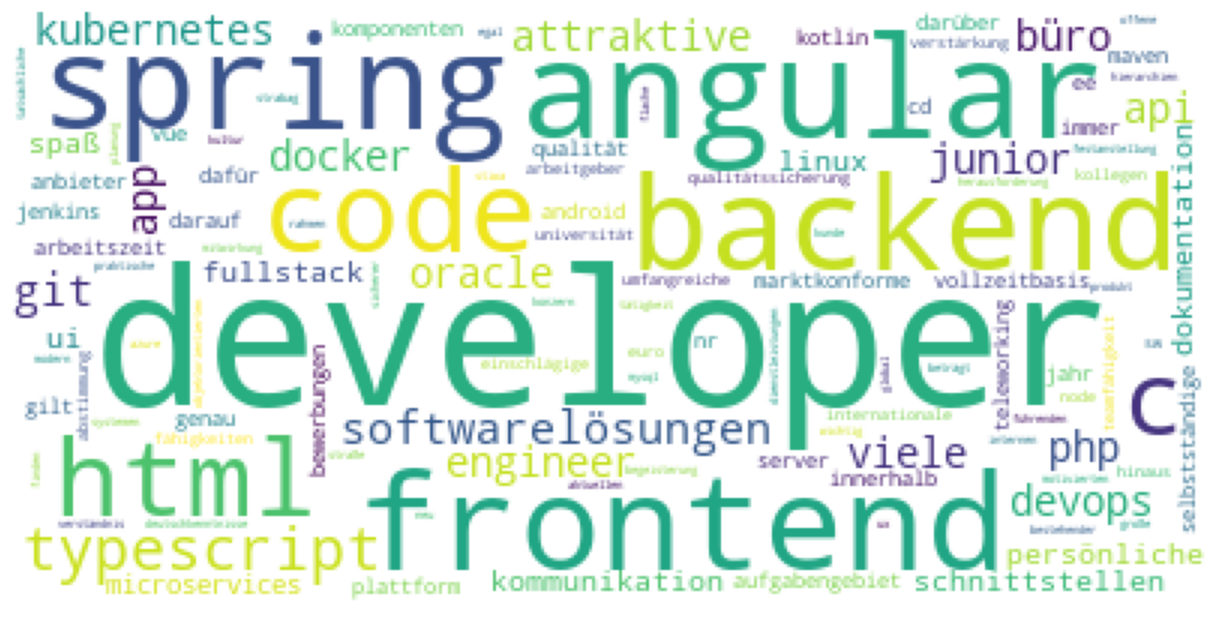

In [53]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [54]:
import pandas as pd

# Sample sentence
sentence = NewCleanedText

# Split the sentence into words
words = sentence.split()

# Calculate the number of rows required
num_rows = (len(words) + 199) // 200

# Create a DataFrame with the required number of rows
df_Words = pd.DataFrame({'Words': ['']*num_rows})

# Populate each row of the DataFrame with up to 200 words
for i in range(num_rows):
    start_index = i * 200
    end_index = min((i+1) * 200, len(words))
    df_Words.iloc[i] = ' '.join(words[start_index:end_index])

# Print the resulting DataFrame
print(df_Words)

                                                 Words
0    developer webapplikationen gestalte onlinebank...
1    hrn oliver rosner obachgasse webjunior develop...
2    groben überblick einsatzgebiet bestehende meth...
3    führenden personalberatungen dach spezialisten...
4    bewerten einsatzbarkeit neuerungen verwendeter...
..                                                 ...
689  flexiblen unterschiedlichsten analyseanwendung...
690  … simulationentwickle jungen aufstrebenden ers...
691  html vergleichbaresneuentwicklung eigener soft...
692  microservices ee spring quarkus § kommunikatio...
693  reine programmierer leidenschaftlicher enginee...

[694 rows x 1 columns]


In [58]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


# Create a CountVectorizer object to convert the job descriptions to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_Words["Words"])

# Get the feature names (i.e. the words/tokens)
feature_names = vectorizer.get_feature_names_out()

# Get the sum of token counts for each feature (i.e. the number of times each word appears in the job descriptions)
word_counts = X.sum(axis=0)

# Create a dictionary mapping feature names to their counts
word_counts_dict = dict(zip(feature_names, word_counts.flat))

# Sort the dictionary by value (i.e. word count) in descending order
sorted_word_counts = sorted(word_counts_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the most common job skills
n_common_skills = 15
common_skills = [skill[0] for skill in sorted_word_counts[:n_common_skills]]
print("The required skills are")
print(common_skills)

The required skills are
['developer', 'angular', 'spring', 'frontend', 'backend', 'code', 'html', 'cs', 'typescript', 'softwarelösungen', 'git', 'php', 'engineer', 'docker', 'oracle']


In [1]:
print("END OF CODE final output generated")

END OF CODE final output generated


In [ ]:
df_1 = pd.DataFrame(common_skills)
print(df_1)

In [ ]:
df_1.to_csv('output.csv')

In [ ]:
print("RESULTS ARE STORED IN OUTPUT.CSV FILE")